In [1]:
# panjivausimport_imputevalue_shippingtime_yq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [13]:
%%time
df = pd.read_csv('portof(un)lading/panjivausimport_imputevalue_shippingtime_yq.csv')

Wall time: 7.52 s


In [14]:
# 100 millions of rows
df.size

92863641

In [15]:
list(df.columns)

['year',
 'quarter',
 'portofladingcountry',
 'gvkey',
 'hscode6',
 'shpcountry',
 'shpname',
 'shppanjivaid',
 'volumeteu',
 'weightkg',
 'valueofgoodsusd',
 'valueofgoodsusd_new',
 'hours']

In [12]:
# Not interested in shippers, hours, 
# df['shppanjivaid'] = df['shppanjivaid'].astype('int64')
# df['shppanjivaid'].dtype
# df = df.drop(columns=['shppanjivaid', 'shpname', 'hours'])

In [16]:
# Which var is better to measure the importing quantity?: volumeteu, weightkg, valueofgoodsusd, valueofgoodsusd_new
# Which one has less NAN or/and 0.0 values?

agr_value = ['volumeteu', 'weightkg', 'valueofgoodsusd', 'valueofgoodsusd_new']

for var in agr_value:
    print(var + ' NAN : ', df[var].isna().sum())

for var in agr_value:
    print(var + ' ZEROS : ', (df[var]==0).sum()/df.size*100, 'percent' )

print('Low number of lost observations')    

volumeteu NAN :  0
weightkg NAN :  0
valueofgoodsusd NAN :  0
valueofgoodsusd_new NAN :  0
volumeteu ZEROS :  0.30385196720856555 percent
weightkg ZEROS :  0.0 percent
valueofgoodsusd ZEROS :  5.268916819662498 percent
valueofgoodsusd_new ZEROS :  2.4027972368647488 percent
Low number of lost observations


In [17]:
print('Number of US importers: ', len(df['gvkey'].unique()))   

Number of US importers:  7667


In [18]:
print('Number of different products: ', len(df['hscode6'].unique()))  

Number of different products:  6012


In [19]:
print('Number of different country source: ', len(df['shpcountry'].unique()))  

Number of different country source:  227


In [20]:
print('Number of different company source: ', 
      len(df['shpname'].unique()), '(shpname)', 
      len(df['shppanjivaid'].unique()), '(shppanjivaid)') 

Number of different company source:  550163 (shpname) 628471 (shppanjivaid)


In [22]:
# df[['year', 'quarter']].value_counts().reset_index(name='count').sort_values(by=['year', 'quarter'], ascending=True)

In [23]:
%%time
df['qs'] = df['year'].astype(str) +'-Q'+ df['quarter'].astype(str)
df['date'] = pd.PeriodIndex(df['qs'], freq='Q').to_timestamp()

Wall time: 2min 10s


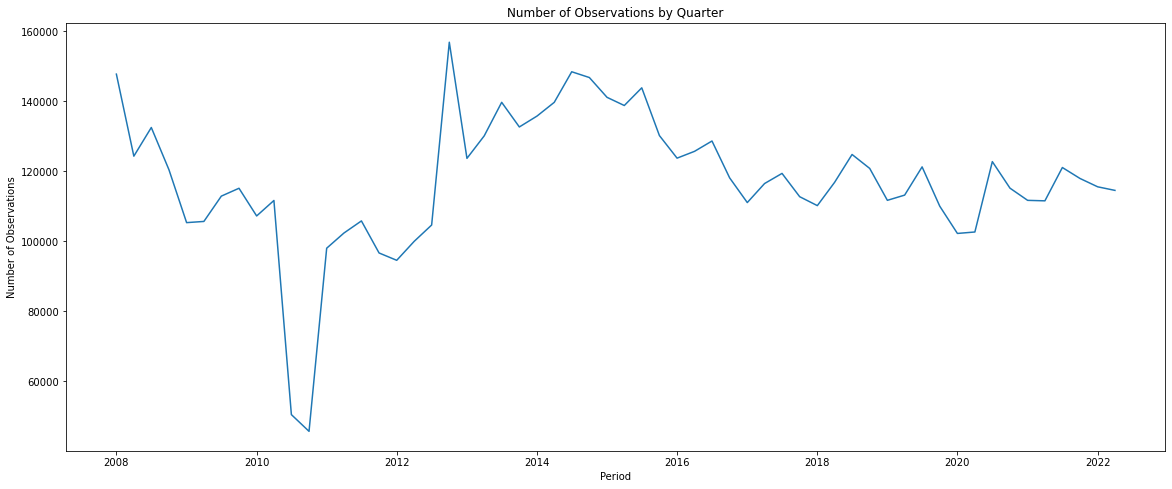

Wall time: 1.4 s


In [24]:
%%time
# Number of Observations by Quarter
df_ = df[['year', 'quarter']].value_counts().reset_index(name='count').sort_values(by=['year', 'quarter'], ascending=True)
df_ = df_[df_.year>2007]
df_['qs'] = df_['year'].astype(str) +'-Q'+ df_['quarter'].astype(str)
df_['date'] = pd.PeriodIndex(df_['qs'], freq='Q').to_timestamp()

cm = 1/2.54  # centimeters in inches
# plt.subplots(figsize=(50*cm, 20*cm))
plt.figure(figsize=(50*cm, 20*cm))
plt.plot(df_["date"], df_["count"])
plt.title("Number of Observations by Quarter")
plt.ylabel("Number of Observations")
plt.xlabel("Period")
# plt.set_ylim(0.0, 200000.0)
plt.show()

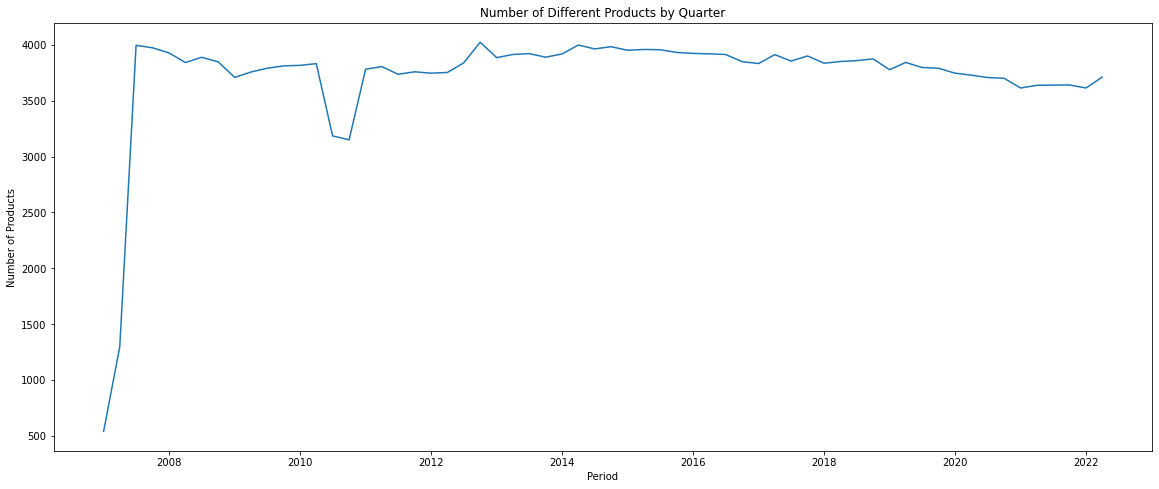

Wall time: 5.32 s


In [25]:
%%time
# Number of different products by Quarter
df_ = df[['year', 'quarter', 'hscode6']].value_counts().reset_index(name='count').sort_values(by=['year', 'quarter'], ascending=True)
df_['qs'] = df_['year'].astype(str) +'-Q'+ df_['quarter'].astype(str)
df_['date'] = pd.PeriodIndex(df_['qs'], freq='Q').to_timestamp()

df2_ = df_[['year', 'quarter']].value_counts().reset_index(name='count').sort_values(by=['year', 'quarter'], ascending=True)
df2_['qs'] = df2_['year'].astype(str) +'-Q'+ df2_['quarter'].astype(str)
df2_['date'] = pd.PeriodIndex(df2_['qs'], freq='Q').to_timestamp()

cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(50*cm, 20*cm))
plt.plot(df2_["date"], df2_["count"])
plt.title("Number of Different Products by Quarter")
plt.ylabel("Number of Products")
plt.xlabel("Period")
plt.show()

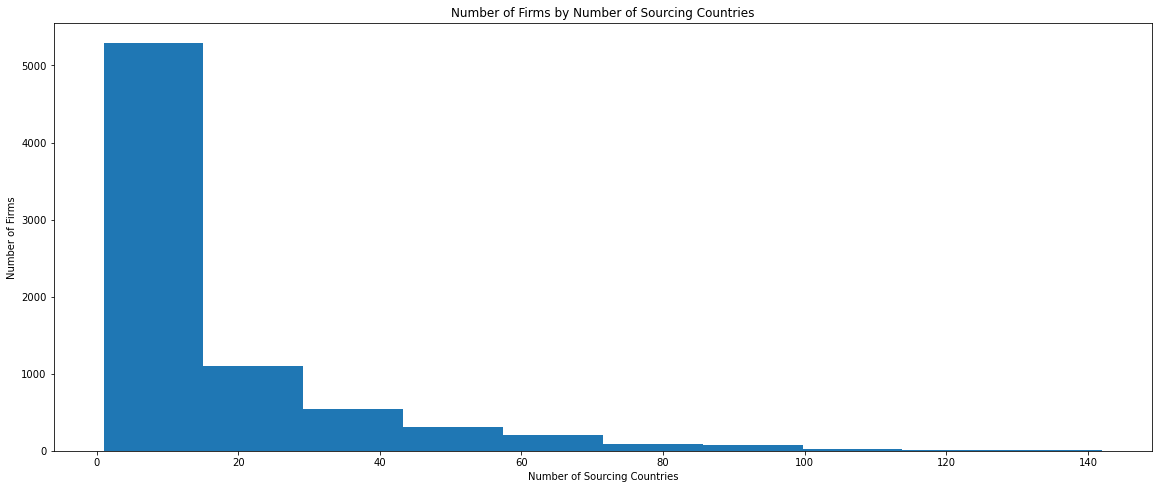

Wall time: 1.36 s


In [26]:
%%time
# Number of Firms by Number of Sourcing Countries
df_ = df[['gvkey', 'shpcountry']].value_counts().reset_index(name='count').sort_values(by=['gvkey'], ascending=False)
df2_ = df_[['gvkey']].value_counts().reset_index(name='count').sort_values(by=['count'], ascending=False)

cm = 1/2.54 # centimeters in inches
plt.subplots(figsize=(50*cm, 20*cm))
plt.hist(df2_["count"])
plt.title("Number of Firms by Number of Sourcing Countries")
plt.ylabel("Number of Firms")
plt.xlabel("Number of Sourcing Countries")
plt.show()

In [27]:
print("Firms import from ", df2_['count'].median(), " different countries.")

Firms import from  7.0  different countries.


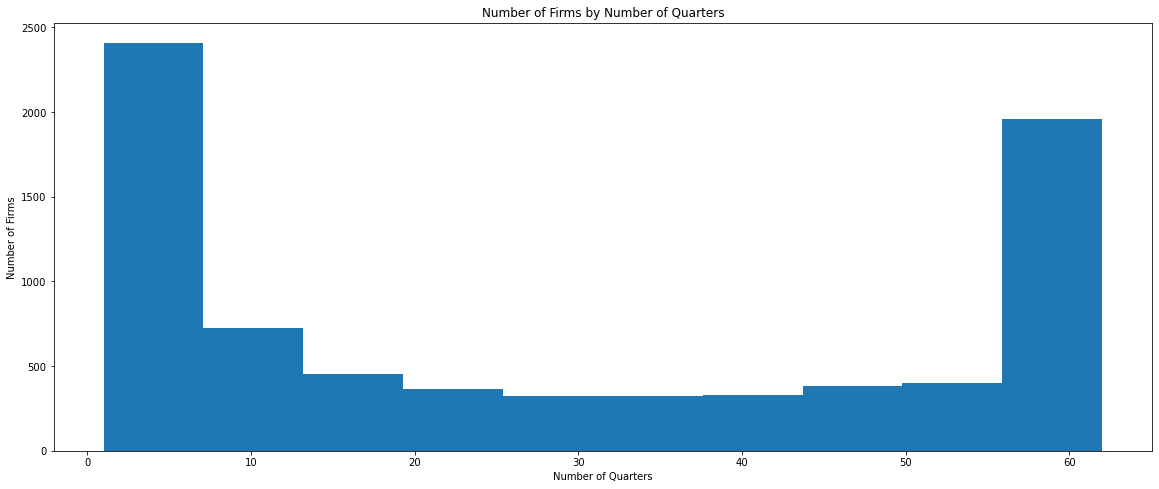

In [28]:
# Number of Firms by Number of Quarters
df_ = df[['gvkey', 'qs']].value_counts().reset_index(name='count').sort_values(by=['qs'], ascending=True)
df2_ = df_[['gvkey']].value_counts().reset_index(name='count').sort_values(by=['count'], ascending=False)

cm = 1/2.54 # centimeters in inches
plt.subplots(figsize=(50*cm, 20*cm))
plt.hist(df2_["count"])
plt.title("Number of Firms by Number of Quarters")
plt.ylabel("Number of Firms")
plt.xlabel("Number of Quarters")
plt.show()

In [29]:
print('Different Quarters : ', len(df.qs.unique()))

Different Quarters :  62


## Starting from here I work with countries we want to analyze

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [29]:
%%time
df = pd.read_csv('portof(un)lading/panjivausimport_imputevalue_shippingtime_yq.csv')
df.head()

Wall time: 11.9 s


,year,quarter,portofladingcountry,gvkey,hscode6,shpcountry,shpname,shppanjivaid,volumeteu,weightkg,valueofgoodsusd,valueofgoodsusd_new,hours
0,2007,1,Algeria,1380,441600,Afghanistan,Sonatach Inc.,40169310.0,0.0,84195700.0,0.0,0.000000e+00,621.33331
1,2007,1,Algeria,165649,270900,Morocco,Sonatrach,44665976.0,0.0,127798700.0,0.0,6.820357e+07,565.00000
2,2007,1,Algeria,294524,843840,Algeria,Sonatrach,44219750.0,0.0,14619000.0,0.0,0.000000e+00,381.00000
3,2007,1,Angola,10530,853949,United States,Master European Spirit,35076306.0,0.0,3.0,0.0,0.000000e+00,NaN
4,2007,1,Aruba,24978,390110,Cayman Islands,Valero Marketing And Supply In,28934806.0,0.0,80647100.0,0.0,1.345678e+08,NaN


In [ ]:
# countries = ['China', 'India', 'Vietnam', 'Philippines', 'Malaysia', 'Thailand']

In [30]:
%%time
df = df[['gvkey', 'year', 'quarter', 'hscode6', 'shpcountry', 'valueofgoodsusd_new']]
df = df[df.year>2007]
df.head()

Wall time: 480 ms


,gvkey,year,quarter,hscode6,shpcountry,valueofgoodsusd_new
333140,1380,2008,1,250300,Algeria,0.000000e+00
333141,1380,2008,1,271012,Afghanistan,0.000000e+00
333142,1380,2008,1,271012,Algeria,0.000000e+00
333143,1380,2008,1,271012,Dominica,0.000000e+00
333144,1380,2008,1,291539,Dominica,1.717822e+07


In [31]:
df.shape

(6810217, 6)

In [36]:
df['hscode6_str'] = df['hscode6'].astype(str)

In [37]:
df['hscode4_str'] = df['hscode6_str'].str.slice(stop=3)

In [38]:
df['hscode4'] = df['hscode4_str'].astype(int)

In [40]:
df.head()

,gvkey,year,quarter,hscode6,shpcountry,valueofgoodsusd_new,hscode6_str,hscode4_str,hscode4
333140,1380,2008,1,250300,Algeria,0.000000e+00,250300,250,250
333141,1380,2008,1,271012,Afghanistan,0.000000e+00,271012,271,271
333142,1380,2008,1,271012,Algeria,0.000000e+00,271012,271,271
333143,1380,2008,1,271012,Dominica,0.000000e+00,271012,271,271
333144,1380,2008,1,291539,Dominica,1.717822e+07,291539,291,291


In [44]:
auto_list = [
87012,
870210,
870290,
870322,
870323,
870324,
870331,
870332,
870333,
870390,
870421,
870422,
870423,
870431,
870432,
870490,
870600,
    ]

In [46]:
df[df['hscode6'].isin(auto_list)]

,gvkey,year,quarter,hscode6,shpcountry,valueofgoodsusd_new,hscode6_str,hscode4_str,hscode4
333363,14489,2008,1,870323,Argentina,5.738387e+03,870323,870,870
333403,31707,2008,1,870324,Argentina,1.261632e+09,870324,870,870
333406,34443,2008,1,870323,Argentina,1.791612e+07,870323,870,870
333580,28191,2008,1,870323,United States,1.255709e+03,870323,870,870
333581,28191,2008,1,870390,United States,3.168904e+02,870390,870,870
...,...,...,...,...,...,...,...,...,...
7143302,63301,2022,2,870323,United States,0.000000e+00,870323,870,870
7143303,63301,2022,2,870390,United States,0.000000e+00,870390,870,870
7143336,120824,2022,2,870323,Virgin Islands (U.S.),0.000000e+00,870323,870,870
7143337,120824,2022,2,870490,Virgin Islands (U.S.),0.000000e+00,870490,870,870


In [50]:
df['qs'] = df['year'].astype(str) +'-Q'+ df['quarter'].astype(str)
df['date'] = pd.PeriodIndex(df['qs'], freq='Q').to_timestamp()

In [56]:
countries = ['China', 'India', 'Vietnam', 'Philippines', 'Malaysia', 'Thailand']
sac = ['India', 'Vietnam', 'Philippines', 'Malaysia', 'Thailand']

In [57]:
df['source'] = np.where(df['shpcountry'].isin(sac), 'SAC', 'Other')

In [58]:
df.loc[df['shpcountry']=='China', 'source'] = 'China'

In [59]:
df.source.unique()

array(['Other', 'SAC', 'China'], dtype=object)

valueofgoodsusd_new
date       source                     
2008-01-01 China          1.323824e+09
           Other          1.239815e+10
           SAC            1.708977e+07
2008-04-01 China          1.390458e+07
           Other          7.378930e+09
...                                ...
2022-01-01 Other          6.782636e+09
           SAC            3.622342e+08
2022-04-01 China          1.749260e+08
           Other          6.808546e+09
           SAC            3.442601e+08

[174 rows x 1 columns]

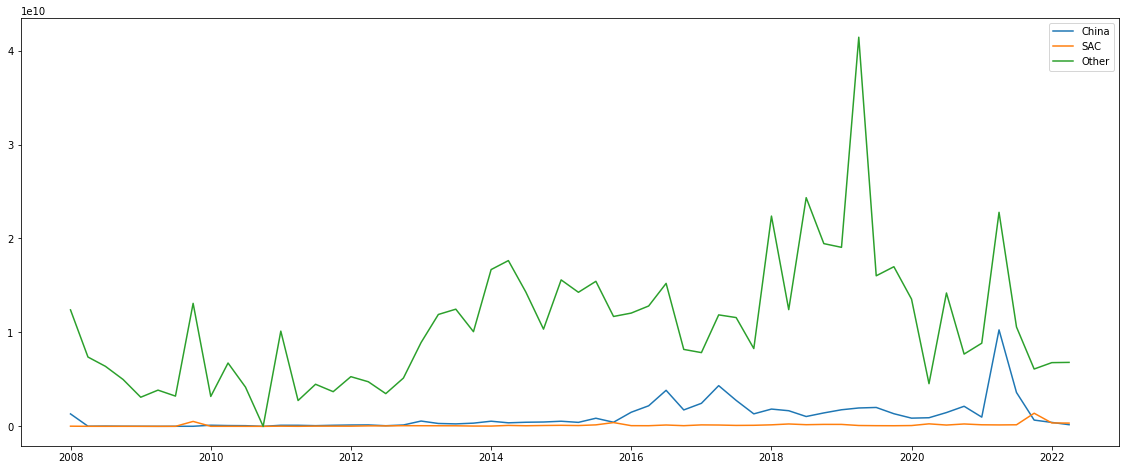

In [93]:
df_ = df[df['hscode6'].isin(auto_list)][['date', 'source', 'valueofgoodsusd_new']].groupby(['date', 'source']).sum().unstack()
df_.columns = df_.columns.droplevel(0)
df_.reset_index(inplace=True)

cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(50*cm, 20*cm))
plt.plot(df_["date"], df_["China"], label='China')
plt.plot(df_["date"], df_["SAC"], label='SAC')
plt.plot(df_["date"], df_["Other"], label='Other')
plt.legend()
plt.show()

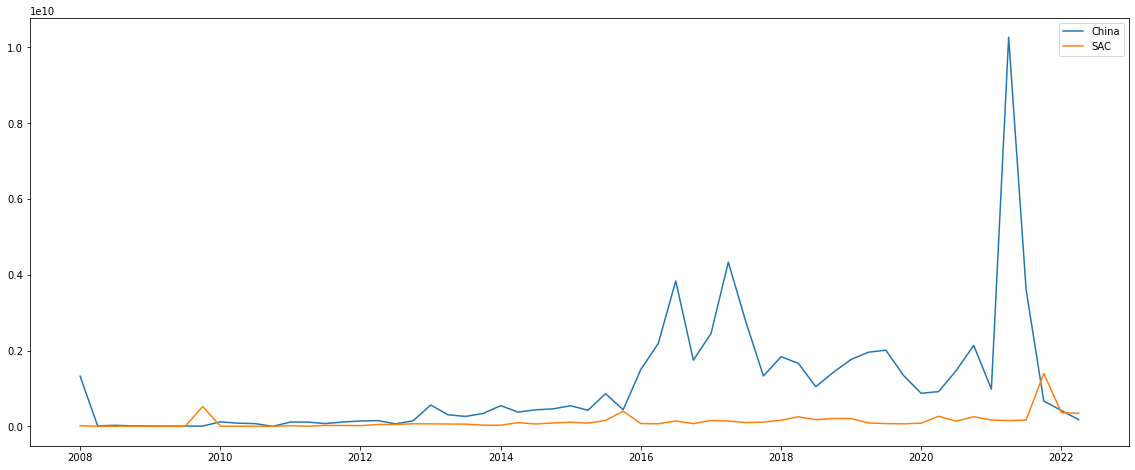

In [95]:
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(50*cm, 20*cm))
plt.plot(df_["date"], df_["China"], label='China')
plt.plot(df_["date"], df_["SAC"], label='SAC')
# plt.plot(df_["date"], df_["Other"], label='Other')
plt.legend()
plt.show()

In [ ]:
# 870120—ROAD TRACTORS FOR SEMI-TRAILERS
# 870210—MV TRNSP >TEN PRSNS COM-IGNTN INTR COMB PIST(DISL)
# 870290—MV FOR TRNSPRT >TEN PERSONS, NESOI
# 870322—PASS MTR VEH,SPARK IGN ENG, >1000CC BUT =<1500CC
# 870323—PASS VEH SPK-IG INT COM RCPR P ENG >1500 NOV 3M CC
# 870324—PASS VEH SPK-IG INT COM RCPR P ENG > 3000 CC
# 870331—PASS MTR VEH, DIESEL ENG, NOT OV 1500 CC
# 870332—PASS VEH COM-IG INT COM ENG > 1500 NOV 2500 CC
# 870333—PASS VEH COM-IG INT COM ENG > 2500 CC
# 870390—PASSENGER MOTOR VEHICLES, NESOI
# 870421—TRUCKS, NESOI, DIESEL ENG, GVW 5 METRIC TONS & UND
# 870422—MTR VEH TRANS GDS COM-IG INT C P E GVW >5NOV20 MTN
# 870423—TRUCK, DIESEL ENG, GVW > 20 METRIC TONS
# 870431—MTR VEH TRANS GDS SPK IG IN C P ENG, GVW NOV 5 MTN
# 870432—MTR VEH TRANS GDS SPK-IG IN C P ENG, GVW > 5 M TN
# 870490—TRUCKS, NESOI
# 870600—CHAS W ENG F TRAC, MTR VEH F PASS/GD & SPECIAL PUR

In [ ]:
# HTS Code 8542-Electronic integrated circuits; parts thereof

In [3]:
df.to_csv('df.csv')

In [7]:
df2 = pd.read_csv('df2.csv')
df2

,gvkey,year,hscode6,shpcountry,USD,gvkey_hscode6_shpcountry
0,1004,2008,190590,China,93847.2000,1
1,1004,2009,291612,China,5579.3110,2
2,1004,2008,392690,China,82123.3800,3
3,1004,2010,441600,India,298284.0000,5
4,1004,2021,681099,India,26192.7900,6
...,...,...,...,...,...,...
396812,345920,2015,940600,China,29115.3800,412077
396813,345920,2016,940600,China,3716.0550,412077
396814,345920,2020,950300,China,132736.4000,412078
396815,345920,2010,950510,China,23561.3500,412081


In [12]:
years = df2['year'].unique()
years.sort()
print(years)

countries = df2['shpcountry'].unique()
countries.sort()
print(countries)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]
['China' 'India' 'Malaysia' 'Philippines' 'Thailand' 'Vietnam']


In [113]:
def get_df_china(country): 
    df = df2[df2['shpcountry']==country].copy()

    dictionary = {year:list(df[df['year']==year]['hscode6'].unique()) for year in years}
    hscode6_list = list(set(sorted({ele for val in dictionary.values() for ele in val})))
    df_country = pd.DataFrame(data=hscode6_list, columns=['hscode6'])

    for year in years:
        df_country = pd.merge(df_country, 
                             pd.DataFrame(data=dictionary[year], columns=[year]), 
                             how='left', left_on='hscode6', right_on=year)
        df_country[year] = df_country[year][~df_country[year].isna()] = df_country[year]
        df_country[year] = df_country[year][df_country[year].isna()] = 0

    return df_country

In [133]:
for country in countries:
    print(country, ' ', df2[df2['shpcountry']==country].shape[0])

China   320207
India   44460
Malaysia   10419
Philippines   3292
Thailand   13066
Vietnam   5373


In [116]:
def get_df_sac(country):
    df = df2[df2['shpcountry']==country].copy()

    dictionary = {year:list(df[df['year']==year]['hscode6'].unique()) for year in years}
    hscode6_list = get_df_china('China')['hscode6']
    df_country = pd.DataFrame(data=hscode6_list, columns=['hscode6'])

    for year in years:
        df_country = pd.merge(df_country, 
                             pd.DataFrame(data=dictionary[year], columns=[year]), 
                             how='left', left_on='hscode6', right_on=year)
        df_country[year] = df_country[year][~df_country[year].isna()] = df_country[year]
        df_country[year] = df_country[year][df_country[year].isna()] = 0
    
    return df_country    
    

In [138]:
def get_df_country(country):
    if country=="China":
        return get_df_china(country)
    else:
        return get_df_sac(country)



In [176]:
get_df_country('China')

,hscode6,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,90112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,901120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,401410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,811010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,843780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4211,401390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4212,810990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4213,901110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4214,720890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [174]:
# gvkey year hscode6 shpcountry USD

def get_df3():
    dictionary = {country: get_df_country(country) for country in countries}
    
    df3 = pd.DataFrame(columns=df2.columns[:-1])
    
    country = 'China'
    year = 2008

    df = dictionary[country][[, 'hscode6', year]].copy()
    df['year'] = year
    df.rename(columns={year:'USD'}, inplace=True)
    df['gvkey']
    
    df3 = df3.append(df)
    
    return df

In [175]:
get_df3()

,hscode6,USD,year
0,90112,0,2008
1,901120,0,2008
2,401410,0,2008
3,811010,0,2008
4,843780,0,2008
...,...,...,...
4211,401390,0,2008
4212,810990,0,2008
4213,901110,0,2008
4214,720890,0,2008


In [143]:
df2

,gvkey,year,hscode6,shpcountry,USD,gvkey_hscode6_shpcountry
0,1004,2008,190590,China,93847.2000,1
1,1004,2009,291612,China,5579.3110,2
2,1004,2008,392690,China,82123.3800,3
3,1004,2010,441600,India,298284.0000,5
4,1004,2021,681099,India,26192.7900,6
...,...,...,...,...,...,...
396812,345920,2015,940600,China,29115.3800,412077
396813,345920,2016,940600,China,3716.0550,412077
396814,345920,2020,950300,China,132736.4000,412078
396815,345920,2010,950510,China,23561.3500,412081


In [3]:
df_others = df[df['other_country']==1]
df_others = df_others.groupby(['gvkey', 'year'])['valueofgoodsusd_new'].sum()
df_others = pd.DataFrame(df_others)
df_others.reset_index(inplace=True)
df_others['shpcountry'] = 'other'
df_others.head()

,gvkey,year,valueofgoodsusd_new,shpcountry
0,1004,2008,3.625607e+07,other
1,1004,2009,6.460776e+06,other
2,1004,2010,3.559806e+03,other
3,1004,2011,8.419212e+06,other
4,1004,2012,1.035171e+07,other


In [4]:
df_sac_chn = df[df['other_country']==0]
df_sac_chn = df_sac_chn.groupby(['gvkey', 'year', 'shpcountry'])['valueofgoodsusd_new'].sum()
df_sac_chn = pd.DataFrame(df_sac_chn)
df_sac_chn.reset_index(inplace=True)
df_sac_chn = df_sac_chn[['gvkey', 'year', 'shpcountry', 'valueofgoodsusd_new']]
df_sac_chn.head()

,gvkey,year,shpcountry,valueofgoodsusd_new
0,1004,2008,China,1.759706e+05
1,1004,2008,Malaysia,2.329172e+05
2,1004,2008,Thailand,8.331604e+08
3,1004,2009,China,5.063263e+05
4,1004,2009,Malaysia,3.506593e+06


In [5]:
df_ = pd.concat([df_sac_chn, df_others], axis='rows')
df_ = df_.pivot(index=['gvkey', 'year'], columns='shpcountry', values='valueofgoodsusd_new')
df_ = df_.replace(np.nan, 0)
df_.reset_index(inplace=True)
df = df_
df

shpcountry,gvkey,year,China,India,Malaysia,Philippines,Thailand,Vietnam,other
0,1004,2008,1.759706e+05,0.000000e+00,2.329172e+05,0.0,8.331604e+08,0.000000,3.625607e+07
1,1004,2009,5.063263e+05,0.000000e+00,3.506593e+06,0.0,1.753958e+08,0.000000,6.460776e+06
2,1004,2010,0.000000e+00,2.982840e+05,0.000000e+00,0.0,0.000000e+00,0.000000,3.559806e+03
3,1004,2011,2.420087e+04,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,8.419212e+06
4,1004,2012,8.785839e+04,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,1.035171e+07
...,...,...,...,...,...,...,...,...,...
68427,345920,2019,1.529161e+06,6.102791e+05,0.000000e+00,0.0,0.000000e+00,87.834008,3.652359e+06
68428,345920,2020,3.707594e+06,1.745024e+06,0.000000e+00,0.0,0.000000e+00,14824.122598,7.451636e+06
68429,345920,2021,5.819701e+06,3.805108e+05,6.460391e+05,0.0,0.000000e+00,0.000000,4.294672e+06
68430,345920,2022,1.107168e+06,1.687240e+05,0.000000e+00,0.0,0.000000e+00,274193.936341,3.897204e+05


In [8]:
df.shape

(68432, 9)

In [7]:
df.to_csv('panel_data.csv')

In [59]:
df_gr = df.copy()
df_gr["date"] = pd.to_datetime(df_gr["year"], format="%Y", errors="coerce")
df_gr = df_gr.drop(['year'], axis=1)
df_gr.set_index(['gvkey', 'date'], inplace=True)
df_gr = df_gr.groupby([pd.Grouper(level='gvkey'), pd.Grouper(level='date', freq='5AS')]).sum()
df_gr['Total'] = df_gr[countries + ['other']].sum(axis=1)
df_gr['SAC'] = df_gr[countries[1:]].sum(axis=1)

cols = df_gr.columns
for col in cols:
    df_gr[col + '_gr'] = df_gr[col].pct_change(periods=1) * 100

for col in cols:
    df_gr[col + '_gr_dummy'] = np.where(df_gr[col + '_gr']>0, 1, 0)
df_gr

shpcountry                China         India      Malaysia   Philippines  \
gvkey  date                                                                 
1004   2008-01-01  7.943561e+05  2.982840e+05  3.739511e+06  0.000000e+00   
       2013-01-01  2.914859e+06  3.471451e+06  7.301945e+05  1.533548e+06   
       2018-01-01  3.625908e+04  2.619279e+04  1.295748e+05  0.000000e+00   
1013   2008-01-01  3.050755e+05  2.020339e+04  0.000000e+00  0.000000e+00   
       2013-01-01  2.456091e+06  0.000000e+00  0.000000e+00  0.000000e+00   
...                         ...           ...           ...           ...   
328795 2018-01-01  2.714273e+07  1.366847e+07  0.000000e+00  0.000000e+00   
345920 2008-01-01  1.155666e+08  4.403072e+06  0.000000e+00  0.000000e+00   
       2013-01-01  1.054665e+07  4.345642e+05  1.899462e+05  2.021472e+05   
       2018-01-01  1.468941e+07  4.154160e+06  6.460391e+05  0.000000e+00   
349530 2013-01-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

shpcountry             Thailand        Vietnam         other         Total  \
gvkey  date                                                                  
1004   2008-01-01  1.008556e+09       0.000000  6.149133e+07  1.074880e+09   
       2013-01-01  0.000000e+00       0.000000  5.701383e+07  6.566389e+07   
       2018-01-01  0.000000e+00       0.000000  8.053331e+06  8.245358e+06   
1013   2008-01-01  0.000000e+00       0.000000  6.200072e+08  6.203325e+08   
       2013-01-01  0.000000e+00       0.000000  9.239270e+08  9.263831e+08   
...                         ...            ...           ...           ...   
328795 2018-01-01  0.000000e+00       0.000000  3.740026e+09  3.780838e+09   
345920 2008-01-01  0.000000e+00   51992.343380  4.595707e+07  1.659787e+08   
       2013-01-01  0.000000e+00  195563.181410  2.251756e+07  3.408643e+07   
       2018-01-01  0.000000e+00  342528.924637  1.761163e+07  3.744377e+07   
349530 2013-01-01  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   

shpcountry                  SAC    China_gr  ...       SAC_gr  China_gr_dummy  \
gvkey  date                                  ...                                
1004   2008-01-01  1.012594e+09         NaN  ...          NaN               0   
       2013-01-01  5.735193e+06  266.946139  ...   -99.433614               1   
       2018-01-01  1.557676e+05  -98.756061  ...   -97.284004               0   
1013   2008-01-01  2.020339e+04  741.376939  ...   -87.029786               1   
       2013-01-01  0.000000e+00  705.076574  ...  -100.000000               1   
...                         ...         ...  ...          ...             ...   
328795 2018-01-01  1.366847e+07  399.869125  ...  1438.885623               1   
345920 2008-01-01  4.455065e+06  325.773653  ...   -67.406267               1   
       2013-01-01  1.022221e+06  -90.873968  ...   -77.054860               0   
       2018-01-01  5.142728e+06   39.280410  ...   403.093663               1   
349530 2013-01-01  0.000000e+00 -100.000000  ...  -100.000000               0   

shpcountry         India_gr_dummy  Malaysia_gr_dummy  Philippines_gr_dummy  \
gvkey  date                                                                  
1004   2008-01-01               0                  0                     0   
       2013-01-01               1                  0                     1   
       2018-01-01               0                  0                     0   
1013   2008-01-01               0                  0                     0   
       2013-01-01               0                  0                     0   
...                           ...                ...                   ...   
328795 2018-01-01               1                  0                     0   
345920 2008-01-01               0                  0                     0   
       2013-01-01               0                  1                     1   
       2018-01-01               1                  1                   

In [9]:
# manufacturing_labour_cost.csv
labour_cost = pd.read_csv('manufacturing_labour_cost.csv')
df_cost = pd.DataFrame({country: np.interp(list(range(1991, 2023)), 
                                           labour_cost[country + "_X"], 
                                           labour_cost[country + "_Y"]
                                          ) for country in countries})
df_cost["year"] = list(range(1991, 2023))
df_cost.to_csv('cost.csv')
df_cost["date"] = pd.to_datetime(df_cost["year"], format="%Y", errors="coerce")
df_cost = df_cost.drop(['year'], axis=1)
df_cost.set_index(['date'], inplace=True)
df_cost

,China,India,Vietnam,Philippines,Malaysia,Thailand
date,,,,,,
1991-01-01,0.180301,0.672842,0.368221,0.826737,1.831703,1.117744
1992-01-01,0.210501,0.628459,0.357868,1.102860,2.142871,1.271861
1993-01-01,0.200150,0.583789,0.346699,1.055606,2.261435,1.450414
1994-01-01,0.148997,0.632730,0.326938,1.185026,2.446767,1.446681
1995-01-01,0.252632,0.684211,0.318519,1.326316,2.758852,1.533134
1996-01-01,0.291203,0.684211,0.309258,1.309595,3.005287,1.619587
1997-01-01,0.304368,0.676296,0.299378,1.254934,3.173254,1.311210
1998-01-01,0.368732,0.673684,0.288974,0.994904,1.700737,1.016890
1999-01-01,0.425263,0.685213,0.301053,1.056526,1.596959,1.155215


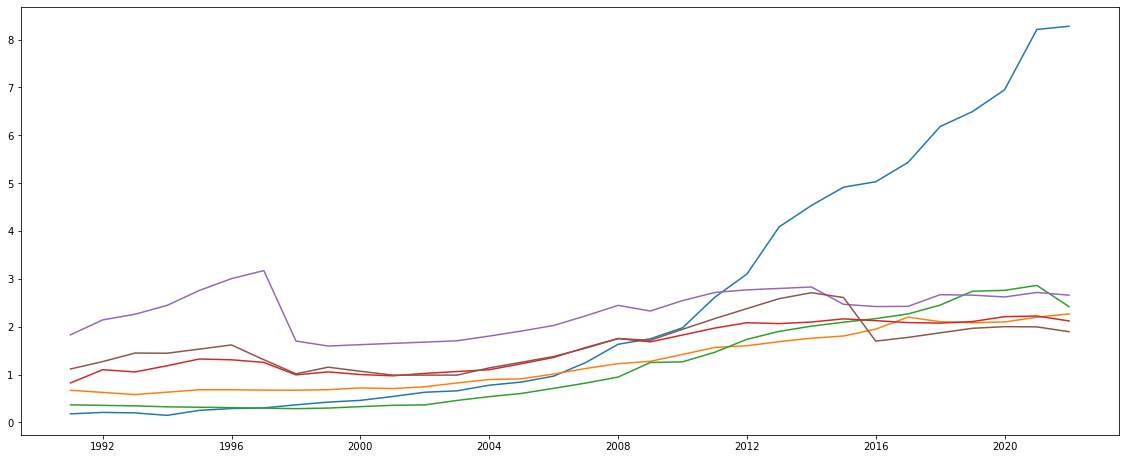

In [120]:
cm = 1/2.54  # centimeters in inches
plt.subplots(figsize=(50*cm, 20*cm))
plt.plot(df_cost.index, df_cost)
plt.show()

In [193]:
df_cost2 = df_cost[df_cost.index.isin(["2008-01-01", "2012-01-01", "2013-01-01", "2017-01-01", "2018-01-01", "2022-01-01"])].copy()

cols = df_cost.columns

for col in cols:
    df_cost2[col] = df_cost2[col].pct_change(periods=1) * 100

df_cost2 = df_cost2[df_cost2.index.isin(["2012-01-01", "2017-01-01", "2022-01-01"])]
df_cost2.index = ["2008-01-01", "2013-01-01", "2018-01-01"]

for country in countries[1:]:
    df_cost2['cost_' + country] = df_cost2["China"]/df_cost2[country]
    
df_cost2 = df_cost2[[col for col in df_cost2 if col.startswith('cost_')]]

df_cost2.reset_index(inplace=True)
df_cost2['date'] = df_cost2['index'] 
df_cost2["date"] = pd.to_datetime(df_cost2["index"], format="%Y-%m-%d", errors="coerce")
df_cost2 = df_cost2.drop(['index'], axis=1)

df_gr2 = pd.merge(df_gr.reset_index(), df_cost2, how="left", on='date')

df_gr2.set_index(['gvkey', 'date'], inplace=True)
df_gr2

,cost_India,cost_Vietnam,cost_Philippines,cost_Malaysia,cost_Thailand
2008-01-01,2.947901,1.079900,4.753006,6.785392,2.517007
2013-01-01,1.086368,1.718887,31.979866,-2.460828,-1.052595
2018-01-01,4.370354,-24.675585,15.582598,-86.594508,26.992084


In [201]:
df_gr2.head()

China         India      Malaysia  Philippines  \
gvkey date                                                                
1004  2008-01-01  7.943561e+05  2.982840e+05  3.739511e+06          0.0   
      2013-01-01  2.914859e+06  3.471451e+06  7.301945e+05    1533548.0   
      2018-01-01  3.625908e+04  2.619279e+04  1.295748e+05          0.0   
1013  2008-01-01  3.050755e+05  2.020339e+04  0.000000e+00          0.0   
      2013-01-01  2.456091e+06  0.000000e+00  0.000000e+00          0.0   

                      Thailand  Vietnam         other         Total  \
gvkey date                                                            
1004  2008-01-01  1.008556e+09      0.0  6.149133e+07  1.074880e+09   
      2013-01-01  0.000000e+00      0.0  5.701383e+07  6.566389e+07   
      2018-01-01  0.000000e+00      0.0  8.053331e+06  8.245358e+06   
1013  2008-01-01  0.000000e+00      0.0  6.200072e+08  6.203325e+08   
      2013-01-01  0.000000e+00      0.0  9.239270e+08  9.263831e+08   

                           SAC    China_gr  ...  Thailand_gr_dummy  \
gvkey date                                  ...                      
1004  2008-01-01  1.012594e+09         NaN  ...                  0   
      2013-01-01  5.735193e+06  266.946139  ...                  0   
      2018-01-01  1.557676e+05  -98.756061  ...                  0   
1013  2008-01-01  2.020339e+04  741.376939  ...                  0   
      2013-01-01  0.000000e+00  705.076574  ...                  0   

                  Vietnam_gr_dummy  other_gr_dummy  Total_gr_dummy  \
gvkey date                                                           
1004  2008-01-01                 0               0               0   
      2013-01-01                 0               0               0   
      2018-01-01                 0               0               0   
1013  2008-01-01                 0               1               1   
      2013-01-01                 0               1               1   

                  SAC_gr_dummy  cost_India  cost_Vietnam  cost_Philippines  \
gvkey date                                                                   
1004  2008-01-01             0    2.947901      1.079900          4.753006   
      2013-01-01             0    1.086368      1.718887         31.979866   
      2018-01-01             0    4.370354    -24.675585         15.582598   
1013  2008-01-01             0    2.947901      1.079900          4.753006   
      2013-01-01             0    1.086368      1.718887         31.979866   

                  cost_Malaysia  cost_Thailand  
gvkey date                                      
1004  2008-01-01       6.785392       2.517007  
      2013-01-01      -2.460828      -1.052595  
      2018-01-01     -86.594508      26.992084  
1013  2008-01-01       6.785392       2.517007  
      2013-01-01      -2.460828      -1.052595  

[5 rows x 32 columns]

In [207]:
for country in countries[1:]:
    df_gr2['cost_' + country + '_gr'] = df_gr2['cost_' + country].pct_change(periods=1) * 100

df_gr2.head()

China         India      Malaysia  Philippines  \
gvkey date                                                                
1004  2008-01-01  7.943561e+05  2.982840e+05  3.739511e+06          0.0   
      2013-01-01  2.914859e+06  3.471451e+06  7.301945e+05    1533548.0   
      2018-01-01  3.625908e+04  2.619279e+04  1.295748e+05          0.0   
1013  2008-01-01  3.050755e+05  2.020339e+04  0.000000e+00          0.0   
      2013-01-01  2.456091e+06  0.000000e+00  0.000000e+00          0.0   

                      Thailand  Vietnam         other         Total  \
gvkey date                                                            
1004  2008-01-01  1.008556e+09      0.0  6.149133e+07  1.074880e+09   
      2013-01-01  0.000000e+00      0.0  5.701383e+07  6.566389e+07   
      2018-01-01  0.000000e+00      0.0  8.053331e+06  8.245358e+06   
1013  2008-01-01  0.000000e+00      0.0  6.200072e+08  6.203325e+08   
      2013-01-01  0.000000e+00      0.0  9.239270e+08  9.263831e+08   

                           SAC    China_gr  ...  cost_India  cost_Vietnam  \
gvkey date                                  ...                             
1004  2008-01-01  1.012594e+09         NaN  ...    2.947901      1.079900   
      2013-01-01  5.735193e+06  266.946139  ...    1.086368      1.718887   
      2018-01-01  1.557676e+05  -98.756061  ...    4.370354    -24.675585   
1013  2008-01-01  2.020339e+04  741.376939  ...    2.947901      1.079900   
      2013-01-01  0.000000e+00  705.076574  ...    1.086368      1.718887   

                  cost_Philippines  cost_Malaysia  cost_Thailand  \
gvkey date                                                         
1004  2008-01-01          4.753006       6.785392       2.517007   
      2013-01-01         31.979866      -2.460828      -1.052595   
      2018-01-01         15.582598     -86.594508      26.992084   
1013  2008-01-01          4.753006       6.785392       2.517007   
      2013-01-01         31.979866      -2.460828      -1.052595   

                  cost_India_gr  cost_Vietnam_gr  cost_Philippines_gr  \
gvkey date                                                              
1004  2008-01-01            NaN              NaN                  NaN   
      2013-01-01     -63.147750        59.170962           572.834594   
      2018-01-01     302.290419     -1535.556307           -51.273723   
1013  2008-01-01     -32.547772      -104.376389           -69.497990   
      2013-01-01     -63.147750        59.170962           572.834594   

                  cost_Malaysia_gr  cost_Thailand_gr  
gvkey date                                            
1004  2008-01-01               NaN               NaN  
      2013-01-01       -136.266559       -141.819334  
      2018-01-01       3418.917308      -2664.336113  
1013  2008-01-01       -107.835822        -90.675019  
      2013-01-01       -136.266559       -141.819334  

[5 rows x 37 columns]

In [199]:
df_gr2.to_csv('data.csv')